# MNIST 手寫數字辨識

> 參考資料：老師講義與 [[Tesorflow Keras 學習筆記]新手一定要玩的MNIST手寫數字辨識](https://sweetornotspicymarathon.medium.com/tesorflow-keras-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-%E6%96%B0%E6%89%8B%E4%B8%80%E5%AE%9A%E8%A6%81%E7%8E%A9%E7%9A%84mnist%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98-9327366cc838#5348)

</br>
自己創造一個簡單的神經網路架構, 來訓練並驗證開源的手寫數字訓練集。

## A. 引入必要資源

### A-1. 安裝依賴項 & 引入函式庫

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
%matplotlib inline

# 數據分析
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import SGD

# 互動設計
from ipywidgets import interact_manual

# 神經打造 web app 的 Gradio
import gradio as gr

### A-2. 提取開源資料集


In [ ]:
# 下載 nmist 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 檢驗 tagged data（圖片）
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(X, cmap = 'Greys')
    print(f'ans: {y_train[n]}')

# 檢驗 tagged data (陣列)
def show_data(n=100):
    X = x_train[n]
    print(X)

# 交互界面(擇一)
interact_manual(show_xy, n=(0, len(x_train)-1))
# interact_manual(show_data, n=(0, len(x_train)-1))

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

<function __main__.show_xy(n=0)>

### A-3. 輸入格式整理

In [ ]:
# 將 28x28 二維陣列轉為長度 784 的一維陣列
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

# 1-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## B. 創建神經網路

建立屬於自己的神經網路。

### B-1. 定義神經基本架構

備註：我解決了範例中的警告 (UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer...)

特點：
* 使用 Normal Distrubution 初始化神經元的權重, 避免 Symmetry Breaking。
* 大幅提高輸入層的神經元個數, 能擷取和分析更豐富的訊息。
* 隱藏層數量提高為 5 層, 神經元數量逐漸減少, 壓縮抽象訊息。


In [ ]:
# 引入標準神經網路
model = Sequential()

# 添加輸入層: 使用 Input() 明確定義輸入形狀 (解決 warning 訊息!)
model.add(Input(shape=(784,)))

# 添加第一個隱藏層
N1 = 512
model.add(Dense(units=N1, kernel_initializer='normal', activation='relu'))

# 添加隱藏層
N2 = 512
N3 = 256
N4 = 128
model.add(Dense(units=N2, activation='relu'))
model.add(Dense(units=N3, activation='relu'))
model.add(Dense(units=N4, activation='relu'))

# 添加輸出層: softmax 激發函數使 Sigma(y)=1
N5 = 10
model.add(Dense(units=N5, activation='softmax'))

### B-2. 編譯神經網路

In [ ]:
# 設定 loss function, optimizer, metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 筆記 ####
# loss: 使用 categorical_crossentropy（交叉熵），適用於多分類問題
# optimizer: 選擇 Adam ，他有自適應學習率，收斂速度快，效果穩定
# metrics: 使用參數 accuracy 來監測模型表現


model.summary() # 檢視 NN

#### 筆記 ####
# 第一層 (輸入層 + 隱藏層): N1 = 512
# 參數量: (784 * 512) + 512 = 401,920

# 第二層 (隱藏層)
# 參數計算: (512 * 512) + 512 = 262,656

# 第三層 (隱藏層)
# 參數計算: (512 * 256) + 256 = 131,328

# 第四層 (隱藏層)
# 參數計算: (256 * 128) + 128 = 32,896

# 第五層 (輸出層, 10 個分類)
# 參數計算: (128 * 10) + 10 = 1,290

# 參數總量: 401,920 + 262,656 + 131,328 + 32,896 + 1,290 = 830,090

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,090 (3.17 MB)

 Trainable params: 830,090 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

### B-3. 模型訓練

須設置超參數。


In [ ]:
# 訓練模型
train_history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,  # 割出20%的數據作為驗證集
    epochs=30,       # 訓練25個週期
    batch_size=200,  # 每次梯度更新使用200筆數據
    verbose=2    # 顯示訓練過程（0:預設,1:進度條,2:每輪簡要輸出）
)

Epoch 1/30
240/240 - 11s - 44ms/step - accuracy: 0.9218 - loss: 0.2713 - val_accuracy: 0.9570 - val_loss: 0.1431
Epoch 2/30
240/240 - 1s - 4ms/step - accuracy: 0.9703 - loss: 0.0961 - val_accuracy: 0.9670 - val_loss: 0.1127
Epoch 3/30
240/240 - 1s - 5ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9689 - val_loss: 0.1016
Epoch 4/30
240/240 - 1s - 5ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9713 - val_loss: 0.0972
Epoch 5/30
240/240 - 1s - 4ms/step - accuracy: 0.9898 - loss: 0.0308 - val_accuracy: 0.9728 - val_loss: 0.0956
Epoch 6/30
240/240 - 1s - 6ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9727 - val_loss: 0.1073
Epoch 7/30
240/240 - 1s - 4ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9764 - val_loss: 0.0911
Epoch 8/30
240/240 - 1s - 4ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9743 - val_loss: 0.1075
Epoch 9/30
240/240 - 2s - 7ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9726 - val_loss: 0.1102

### B-4. 觀看訓練過程

> 參考資料: [來把訓練過程畫出來](https://gist.githubusercontent.com/SYkkk55/57c5d68660dca74416d62bf4e6f7c159/raw/c303605940f561068e567c01f0134dd8db026052/plot%20train%20history.py)

使用第一堂課程所學的 matplotlib 繪製圖表 !

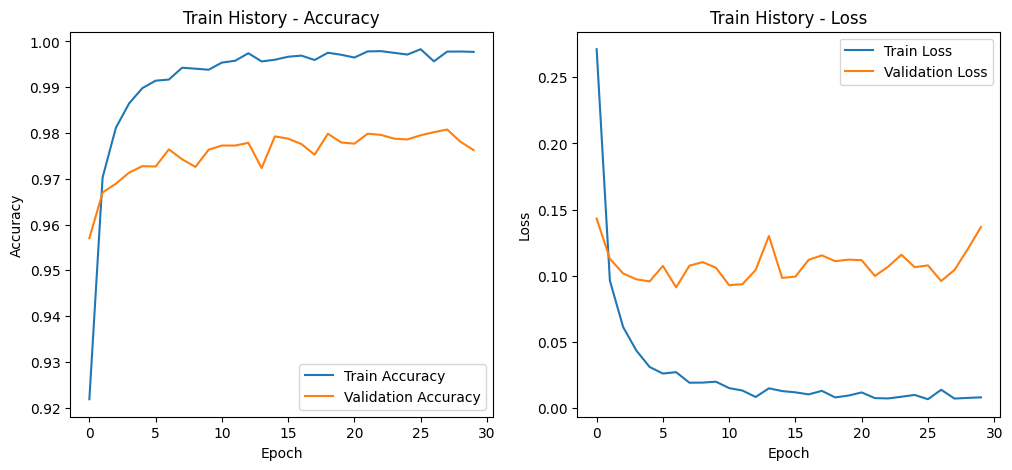

In [ ]:
import matplotlib.pyplot as plt

# 繪製訓練過程
def plot_train_history(train_history):
    plt.figure(figsize=(12, 5))

    # 繪製準確率
    plt.subplot(1, 2, 1)
    plt.plot(train_history.history['accuracy'], label='Train Accuracy')
    plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Train History - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 繪製損失值
    plt.subplot(1, 2, 2)
    plt.plot(train_history.history['loss'], label='Train Loss')
    plt.plot(train_history.history['val_loss'], label='Validation Loss')
    plt.title('Train History - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# 繪製圖表
plot_train_history(train_history)


#### 筆記 ####
# 使用 Matplotlib 繪製訓練歷史記錄
# 左圖: 準確率變化 => 觀察是否有過擬合（訓練集高但驗證集低）
# 右圖: 損失值變化 => 目標是 loss 下降且收斂，避免 loss 持續上升（過擬合）

# 結論：實測後在 epochs 比較低時(實測過10/15/20), validation acc 一直呈現劇烈的波動
# epochs 數量提高後會比較穩定一些
# 但是在 epochs=50 時, validation loss 極具飆升, 已經過擬合了
# 所以最終選擇 epochs=30, 呈現的圖表比較完美！

### B-5. 評估模型（對於原生資料集）

In [ ]:
# 評估損失與準確度
loss, acc = model.evaluate(x_test, y_test)
print(f'loss={loss:.2f}, acc={acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9727 - loss: 0.1392
loss=0.12, acc=0.98


### B-6. 模型部署測試

實際檢視模型訓練的結果如何！

In [ ]:
# 傳入學習結果
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# 測試函數 GUI
def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap='Greys')
    print(f'ans={y_test[num].argmax()}, predict={predict[num]}')

interact_manual(test, num=(0, 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

## C. 部署模型並搭配 GUI 呈現

將利用 Gradio 庫簡單地製作交互界面。

### C-1. 處理用戶輸入的手寫圖像

In [ ]:
# 調整圖像
def resize_image(inp):
    # img 在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PLT 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設成白色, 再把 RGBA -> RGB
    background = Image.new("RGB", image_pil.size, (255,255,255))
    background.paste(image_pil, mask=image_pil.split()[3])
    image_pil = background

    # 轉灰階
    image_gray = image_pil.convert("L")
    img_array = np.array(image_gray.resize((28,28), resample=Image.LANCZOS))
    img_array = 255 - img_array
    img_array = img_array.reshape(1, 784)/255.0
    return img_array

### C-2. 部署模型

In [ ]:
# 辨識數字
def recognize_digit(inp):
    img_array = resize_image(inp) # 影像預處理
    prediction = model.predict(img_array).flatten() # 模型預測
    labels = list('0123456789') # 數字標籤
    return {labels[i]: float(prediction[i]) for i in range(10)} # 回傳數字對應機率的字典

### C-3. 在 Gradio Web 中呈現模型

> 參考資料：老師講義和 [How to Make a Sketchpad for ML Projects in Gradio?](https://www.geeksforgeeks.org/how-to-make-a-sketchpad-for-ml-projects-in-gradio/)

* optimization
    * 更清楚有趣的界面
    * 添加筆刷顏色
    * 縮小繪圖空間避免版面炸掉

In [ ]:
# custom css
css = """
.gradio-sketchpad canvas {
    background-color: #333333 !important; /* 深灰色背景 */
}
"""

In [ ]:
# 定義筆刷樣式 (issue: https://github.com/gradio-app/gradio/issues/9105)
brush=gr.Brush(colors=["#00FF00", "#FF0000"], color_mode='fixed')

# 創建 gradio 界面
iface = gr.Interface(
    fn=recognize_digit,  # 指定處理函式
    inputs=gr.Sketchpad(width=650, height=650, brush=brush),  # 設定頁面和筆刷
    outputs=gr.Label(num_top_classes=3, label="Prediction Result"),  # 自訂輸出標籤
    title="🖌️ Handwritten Digit Recognition 🖌️",
    description="""
       <div style='text-align: center; font-size: 16px; color: white;'>
        ✨ 請在繪圖區手寫數字，模型會嘗試辨識出你寫的數字！✨
        </div>
    """,
    theme="soft",  # 柔和風主題
    live=True  # 預測即時更新
)

# 啟動 Web 介面
iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1ef2d365850f437559.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
